# Q1 : Calculate ROI ( Return on Investment ) for each movie
	ROI is calculated as : Profit / Budget
	Profit is calculated as : BoxOffice Collections - Budget
	Which are the top 3 movies with highest ROI across all industries?
	Which are the top 3 Hindi movies with highest ROI?
	Which are the top 3 Telugu movies with highest ROI?
	Plot all this information in separate graphs

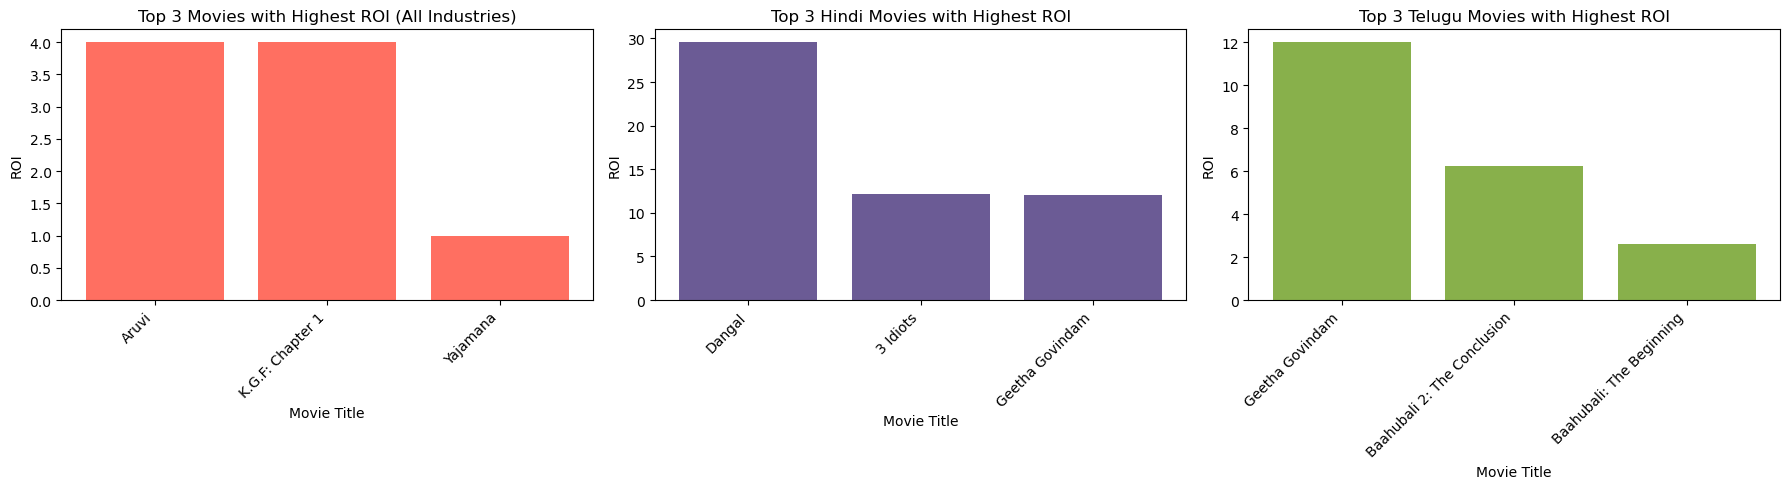

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the movie data from Excel files
indian_movies = pd.read_excel('cleaned_movies_data/cleaned_indian_movies.xlsx')
bollywood_movies = pd.read_excel('cleaned_movies_data/cleaned_bollywood_movies.xlsx')
tollywood_movies = pd.read_excel('cleaned_movies_data/cleaned_tollywood_movies.xlsx')

# Function to calculate ROI for a given DataFrame
def calculate_roi(dataframe):
    # Calculate Profit and ROI
    dataframe['Profit'] = dataframe['BoxOffice (Crores)'] - dataframe['Budget (Crores)']
    dataframe['ROI'] = dataframe['Profit'] / dataframe['Budget (Crores)']
    return dataframe

# Calculate ROI for each movie dataset
indian_movies = calculate_roi(indian_movies)
bollywood_movies = calculate_roi(bollywood_movies)
tollywood_movies = calculate_roi(tollywood_movies)

# Get the top 3 movies with the highest ROI across all industries
top3_all = indian_movies.sort_values(by='ROI', ascending=False).drop_duplicates(subset='Title').head(3)

# Get the top 3 Hindi movies with the highest ROI
top3_hindi = bollywood_movies.sort_values(by='ROI', ascending=False).drop_duplicates(subset='Title').head(3)

# Get the top 3 Telugu movies with the highest ROI
top3_telugu = tollywood_movies.sort_values(by='ROI', ascending=False).drop_duplicates(subset='Title').head(3)

# Function to plot the top 3 movies by ROI
def plot_top_movies(top_movies, title, color):
    plt.bar(top_movies['Title'], top_movies['ROI'], color=color)
    plt.title(title)
    plt.xlabel('Movie Title')
    plt.ylabel('ROI')
    plt.xticks(rotation=45, ha='right')

# Create a figure for the plots
plt.figure(figsize=(18, 5))

# Plot the top 3 movies across all industries
plt.subplot(1, 3, 1)
plot_top_movies(top3_all, 'Top 3 Movies with Highest ROI (All Industries)', '#FF6F61')  # Coral

# Plot the top 3 Hindi movies
plt.subplot(1, 3, 2)
plot_top_movies(top3_hindi, 'Top 3 Hindi Movies with Highest ROI', '#6B5B95')  # Indigo

# Plot the top 3 Telugu movies
plt.subplot(1, 3, 3)
plot_top_movies(top3_telugu, 'Top 3 Telugu Movies with Highest ROI', '#88B04B')  # Olive Green

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('Q1_output.png')
plt.show()
